In [149]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('marinetrafficdata.csv')
df.head()

,LAT,LON,SPEED,COURSE,HEADING,ELAPSED,DESTINATION,FLAG,LENGTH,ROT,...,SHIPTYPE,SHIP_ID,WIDTH,L_FORE,W_LEFT,DWT,GT_SHIPTYPE,TYPE_IMG,TYPE_NAME,STATUS_NAME
0,25.597553,-79.847740,143.0,13.0,16.0,2,MILAZZO,LR,274.0,0.0,...,8,756062,48.0,229.0,19.0,160024.0,17.0,NaN,NaN,NaN
1,42.139000,-80.082520,0.0,11.0,NaN,3,"ERIE,PA",US,50.0,NaN,...,3,965443,9.0,37.0,6.0,968.0,35.0,NaN,NaN,NaN
2,36.778286,-25.790749,106.0,105.0,107.0,2,ITRAN,PT,199.0,0.0,...,7,9415858,24.0,174.0,5.0,37630.0,9.0,NaN,NaN,NaN
3,25.147181,-16.112907,136.0,20.0,24.0,2,GBFXT,JP,400.0,0.0,...,7,5112492,58.0,143.0,25.0,196126.0,11.0,NaN,NaN,NaN
4,37.627083,-72.106117,133.0,50.0,51.0,2,GBSOU,MT,349.0,0.0,...,7,580,42.0,258.0,31.0,113964.0,11.0,NaN,NaN,NaN


In [150]:
# basic info
df.shape
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10141 entries, 0 to 10140
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LAT          10141 non-null  float64
 1   LON          10141 non-null  float64
 2   SPEED        10077 non-null  float64
 3   COURSE       9964 non-null   float64
 4   HEADING      3407 non-null   float64
 5   ELAPSED      10141 non-null  int64  
 6   DESTINATION  4685 non-null   object 
 7   FLAG         4795 non-null   object 
 8   LENGTH       4797 non-null   float64
 9   ROT          2744 non-null   float64
 10  SHIPNAME     10141 non-null  object 
 11  SHIPTYPE     10141 non-null  int64  
 12  SHIP_ID      10141 non-null  object 
 13  WIDTH        4797 non-null   float64
 14  L_FORE       4789 non-null   float64
 15  W_LEFT       4789 non-null   float64
 16  DWT          4603 non-null   float64
 17  GT_SHIPTYPE  4618 non-null   float64
 18  TYPE_IMG     5343 non-null   float64
 19  TYPE

In [151]:
# missing values per column, % of not covered
df.isnull().sum()
(df.isnull().sum() / len(df)) * 100

LAT             0.000000
LON             0.000000
SPEED           0.631101
COURSE          1.745390
HEADING        66.403708
ELAPSED         0.000000
DESTINATION    53.801400
FLAG           52.716695
LENGTH         52.696973
ROT            72.941525
SHIPNAME        0.000000
SHIPTYPE        0.000000
SHIP_ID         0.000000
WIDTH          52.696973
L_FORE         52.775860
W_LEFT         52.775860
DWT            54.609999
GT_SHIPTYPE    54.462085
TYPE_IMG       47.312888
TYPE_NAME      47.312888
STATUS_NAME    47.687605
dtype: float64

In [152]:
# numerical columns stats
df.describe()

,LAT,LON,SPEED,COURSE,HEADING,ELAPSED,LENGTH,ROT,SHIPTYPE,WIDTH,L_FORE,W_LEFT,DWT,GT_SHIPTYPE,TYPE_IMG
count,10141.000000,10141.000000,10077.000000,9964.000000,3407.000000,10141.000000,4797.000000,2744.000000,10141.000000,4797.000000,4789.000000,4789.000000,4603.000000,4618.000000,5343.000000
mean,4.665207,7.123896,98.437630,181.214773,180.597887,125.914999,221.774234,0.016035,6.488315,35.620596,161.529129,17.966381,99602.609385,29.413166,6.199701
std,27.617876,92.489427,52.542102,101.715752,100.166053,294.595915,95.900569,3.841904,1.937685,15.141806,82.895364,9.531196,91843.999718,41.842335,2.175126
min,-67.571815,-179.994200,0.000000,0.000000,0.000000,2.000000,0.000000,-40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,-15.111783,-56.018478,78.000000,96.000000,94.500000,4.000000,177.000000,0.000000,7.000000,27.000000,113.000000,10.000000,32005.500000,6.000000,7.000000
50%,0.796538,0.311667,110.000000,177.500000,183.000000,11.000000,228.000000,0.000000,7.000000,32.000000,170.000000,18.000000,76529.000000,11.000000,7.000000
75%,25.147181,76.173332,130.000000,274.000000,267.000000,23.000000,294.000000,0.000000,7.000000,46.000000,226.000000,25.000000,155720.000000,19.000000,7.000000
max,81.064270,179.989170,405.000000,359.000000,359.000000,1440.000000,516.000000,125.000000,9.000000,124.000000,442.000000,63.000000,499125.000000,241.000000,9.000000


In [153]:
# categorical columns value counts
print(df['SHIPTYPE'].value_counts()
,df['TYPE_NAME'].value_counts()
,df['STATUS_NAME'].value_counts()
,df['FLAG'].value_counts())

SHIPTYPE
7    5840
8    2411
2     982
3     479
6     185
9     117
0      82
1      38
4       7
Name: count, dtype: int64 TYPE_NAME
Cargo Vessel            2965
Tanker                  1147
Fishing                  782
Tugs & Special Craft     239
Passenger Vessel          73
Unspecified Ship          63
Pleasure Craft            49
Navigation Aids           22
High Speed Craft           3
Name: count, dtype: int64 STATUS_NAME
Underway using Engine         4362
Default                        216
Unknown                        190
At Anchor                      121
Moored                         119
Engaged in Fishing             104
Underway by Sail                91
Restricted Manoeuvrability      42
Nav Aid                         18
Not Under Command               15
Towing Astern                   13
Pushing Ahead - Towing           7
Aground                          3
Constrained by her Draught       2
Nav Aid - SART - MOB             2
Name: count, dtype: int64 FLAG
LR    792


In [154]:
# Compare TYPE_IMG vs SHIPTYPE
comparison = df[df['TYPE_IMG'].notna()].copy()
(comparison['TYPE_IMG'] == comparison['SHIPTYPE']).all()
print("\nTYPE_IMG to TYPE_NAME mapping:")
comparison.groupby('TYPE_IMG')['TYPE_NAME'].first().sort_index()


TYPE_IMG to TYPE_NAME mapping:


TYPE_IMG
0.0        Unspecified Ship
1.0         Navigation Aids
2.0                 Fishing
3.0    Tugs & Special Craft
4.0        High Speed Craft
6.0        Passenger Vessel
7.0            Cargo Vessel
8.0                  Tanker
9.0          Pleasure Craft
Name: TYPE_NAME, dtype: object

In [155]:
# Fill TYPE_NAME using SHIPTYPE mapping
type_mapping = df[df['TYPE_IMG'].notna()].groupby('SHIPTYPE')['TYPE_NAME'].first()
df['TYPE_NAME'] = df['SHIPTYPE'].map(type_mapping)
df['TYPE_NAME'].value_counts()

TYPE_NAME
Cargo Vessel            5840
Tanker                  2411
Fishing                  982
Tugs & Special Craft     479
Passenger Vessel         185
Pleasure Craft           117
Unspecified Ship          82
Navigation Aids           38
High Speed Craft           7
Name: count, dtype: int64

In [156]:
# Drop SHIPTYPE and TYPE_IMG columns, rename TYPE_NAME to SHIPTYPE
df = df.drop(['SHIPTYPE', 'TYPE_IMG'], axis=1)
df = df.rename(columns={'TYPE_NAME': 'SHIPTYPE'})
df.head()

,LAT,LON,SPEED,COURSE,HEADING,ELAPSED,DESTINATION,FLAG,LENGTH,ROT,SHIPNAME,SHIP_ID,WIDTH,L_FORE,W_LEFT,DWT,GT_SHIPTYPE,SHIPTYPE,STATUS_NAME
0,25.597553,-79.847740,143.0,13.0,16.0,2,MILAZZO,LR,274.0,0.0,RED MOON,756062,48.0,229.0,19.0,160024.0,17.0,Tanker,NaN
1,42.139000,-80.082520,0.0,11.0,NaN,3,"ERIE,PA",US,50.0,NaN,J.S.ST.JOHN,965443,9.0,37.0,6.0,968.0,35.0,Tugs & Special Craft,NaN
2,36.778286,-25.790749,106.0,105.0,107.0,2,ITRAN,PT,199.0,0.0,POLSTEAM RUDNO,9415858,24.0,174.0,5.0,37630.0,9.0,Cargo Vessel,NaN
3,25.147181,-16.112907,136.0,20.0,24.0,2,GBFXT,JP,400.0,0.0,ONE TRADITION,5112492,58.0,143.0,25.0,196126.0,11.0,Cargo Vessel,NaN
4,37.627083,-72.106117,133.0,50.0,51.0,2,GBSOU,MT,349.0,0.0,CMA CGM FIDELIO,580,42.0,258.0,31.0,113964.0,11.0,Cargo Vessel,NaN


,SHIPNAME,SPEED,SHIPTYPE,LENGTH
29,MAERSK HANOI,207.0,Cargo Vessel,353.0
91,CIUDAD DE VALENCIA,211.0,Passenger Vessel,203.0
401,[SAT-AIS],233.0,Cargo Vessel,NaN
635,KOTA EAGLE,202.0,Cargo Vessel,355.0
636,[SAT-AIS],205.0,Cargo Vessel,NaN
...,...,...,...,...
9791,[SAT-AIS],201.0,Cargo Vessel,NaN
9874,ZIM ALEXANDRITE,205.0,Cargo Vessel,272.0
9875,[SAT-AIS],212.0,Cargo Vessel,NaN
9882,EVER FIT,202.0,Cargo Vessel,333.0


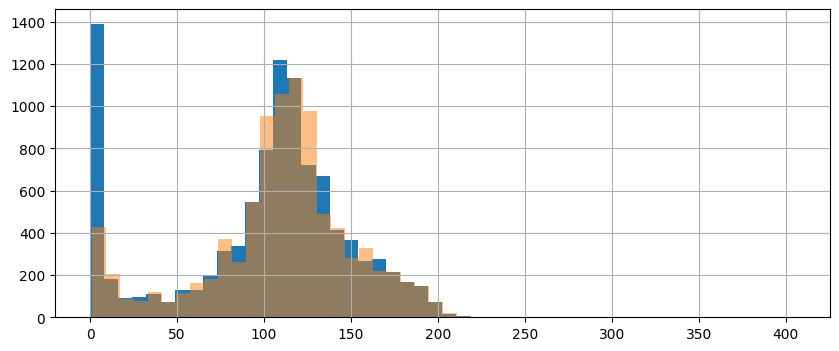

In [157]:
# SPEED analysis
df['SPEED'].hist(bins=50, figsize=(10,4))
df[df['SPEED'] > 0]['SPEED'].hist(bins=50, figsize=(10,4), alpha=0.5)
df[df['SPEED'] > df['SPEED'].quantile(0.99)][['SHIPNAME', 'SPEED', 'SHIPTYPE', 'LENGTH']]

In [158]:
# SPEED vs STATUS_NAME
df.groupby('STATUS_NAME')['SPEED'].describe()

,count,mean,std,min,25%,50%,75%,max
STATUS_NAME,,,,,,,,
Aground,3.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
At Anchor,120.0,44.633333,54.308322,0.0,0.00,8.0,90.25,173.0
Constrained by her Draught,2.0,110.500000,3.535534,108.0,109.25,110.5,111.75,113.0
Default,216.0,60.652778,44.349928,0.0,24.75,72.0,88.00,405.0
Engaged in Fishing,104.0,65.567308,32.606142,0.0,40.00,70.5,85.25,130.0
Moored,118.0,60.822034,54.933780,0.0,0.00,70.0,116.00,182.0
Nav Aid,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nav Aid - SART - MOB,2.0,76.500000,16.263456,65.0,70.75,76.5,82.25,88.0
Not Under Command,15.0,46.600000,53.149116,0.0,8.00,20.0,99.00,151.0


In [159]:
df['STATUS_NAME'].value_counts()

STATUS_NAME
Underway using Engine         4362
Default                        216
Unknown                        190
At Anchor                      121
Moored                         119
Engaged in Fishing             104
Underway by Sail                91
Restricted Manoeuvrability      42
Nav Aid                         18
Not Under Command               15
Towing Astern                   13
Pushing Ahead - Towing           7
Aground                          3
Constrained by her Draught       2
Nav Aid - SART - MOB             2
Name: count, dtype: int64

In [160]:
df[df['STATUS_NAME'].isin(['At Anchor', 'Moored'])]['SPEED'].describe()

count    238.000000
mean      52.659664
std       55.104176
min        0.000000
25%        0.000000
50%       35.500000
75%      100.000000
max      182.000000
Name: SPEED, dtype: float64

In [161]:
# SPEED vs SHIPTYPE
df.groupby('SHIPTYPE')['SPEED'].describe()

,count,mean,std,min,25%,50%,75%,max
SHIPTYPE,,,,,,,,
Cargo Vessel,5834.0,109.889098,48.725532,0.0,98.00,115.0,135.00,233.0
Fishing,978.0,63.989775,36.940101,0.0,35.00,73.0,91.00,155.0
High Speed Craft,7.0,108.714286,123.317631,0.0,7.50,86.0,189.00,282.0
Navigation Aids,4.0,65.500000,24.879711,29.0,62.75,74.0,76.75,85.0
Passenger Vessel,185.0,69.805405,70.520849,0.0,0.00,69.0,126.00,216.0
Pleasure Craft,117.0,48.051282,49.906438,0.0,0.00,48.0,70.00,405.0
Tanker,2410.0,100.890871,51.564958,0.0,88.00,120.0,133.00,200.0
Tugs & Special Craft,475.0,47.941053,44.732924,0.0,0.00,50.0,81.00,232.0
Unspecified Ship,67.0,41.835821,49.857858,0.0,8.00,27.0,71.00,332.0


In [162]:
# SPEED vs LENGTH (size)
df[df['LENGTH'].notna()].groupby(pd.cut(df['LENGTH'], bins=[0, 50, 150, 500]))['SPEED'].describe()

C:\Users\Neil Lunavat\AppData\Local\Temp\ipykernel_404\625239941.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df['LENGTH'].notna()].groupby(pd.cut(df['LENGTH'], bins=[0, 50, 150, 500]))['SPEED'].describe()


,count,mean,std,min,25%,50%,75%,max
LENGTH,,,,,,,,
"(0, 50]",293.0,44.290102,46.268067,0.0,0.0,40.0,81.0,277.0
"(50, 150]",691.0,65.457308,53.867194,0.0,1.0,78.0,110.0,282.0
"(150, 500]",3766.0,103.666755,56.069267,0.0,88.5,116.0,136.0,332.0


In [163]:
# HEADING vs COURSE availability
pd.crosstab(df['HEADING'].notna(), df['COURSE'].notna(), margins=True)

COURSE,False,True,All
HEADING,,,
False,154,6580,6734
True,23,3384,3407
All,177,9964,10141


count    3384.000000
mean       25.865248
std        45.691826
min         0.000000
25%         1.000000
50%         3.000000
75%        21.250000
max       180.000000
Name: HC_DIFF_ABS, dtype: float64

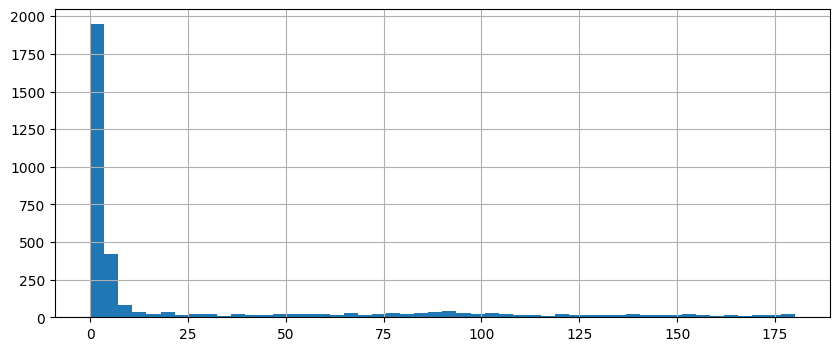

In [164]:
# HEADING vs COURSE difference (circular)
both = df[(df['HEADING'].notna()) & (df['COURSE'].notna())].copy()
both['HC_DIFF'] = both.apply(lambda r: r['HEADING'] - r['COURSE'] if abs(r['HEADING'] - r['COURSE']) <= 180 
                              else r['HEADING'] - r['COURSE'] - 360 if r['HEADING'] - r['COURSE'] > 180 
                              else r['HEADING'] - r['COURSE'] + 360, axis=1)
both['HC_DIFF_ABS'] = both['HC_DIFF'].abs()
both['HC_DIFF_ABS'].hist(bins=50, figsize=(10,4))
both['HC_DIFF_ABS'].describe()

In [165]:
# HC_DIFF vs SPEED
both[both['SPEED'].notna()].groupby(pd.cut(both['SPEED'], bins=[-1, 2, 5, 10, 1000]))['HC_DIFF_ABS'].describe()

C:\Users\Neil Lunavat\AppData\Local\Temp\ipykernel_404\990673676.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  both[both['SPEED'].notna()].groupby(pd.cut(both['SPEED'], bins=[-1, 2, 5, 10, 1000]))['HC_DIFF_ABS'].describe()


,count,mean,std,min,25%,50%,75%,max
SPEED,,,,,,,,
"(-1, 2]",721.0,86.371706,50.541050,0.0,46.00,89.0,124.00,180.0
"(2, 5]",58.0,85.396552,52.401265,0.0,49.25,90.5,123.75,177.0
"(5, 10]",62.0,72.000000,53.010670,0.0,32.75,58.5,101.50,177.0
"(10, 1000]",2543.0,6.227684,19.208893,0.0,1.00,2.0,3.00,180.0


In [166]:
# HC_DIFF vs LENGTH (size)
both[both['LENGTH'].notna()].groupby(pd.cut(both['LENGTH'], bins=[0, 50, 150, 500]))['HC_DIFF_ABS'].describe()

C:\Users\Neil Lunavat\AppData\Local\Temp\ipykernel_404\1626350720.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  both[both['LENGTH'].notna()].groupby(pd.cut(both['LENGTH'], bins=[0, 50, 150, 500]))['HC_DIFF_ABS'].describe()


,count,mean,std,min,25%,50%,75%,max
LENGTH,,,,,,,,
"(0, 50]",143.0,40.895105,54.889994,0.0,2.0,6.0,73.5,178.0
"(50, 150]",535.0,35.284112,52.983264,0.0,1.5,4.0,56.5,180.0
"(150, 500]",2703.0,23.170181,43.075716,0.0,1.0,2.0,10.0,180.0


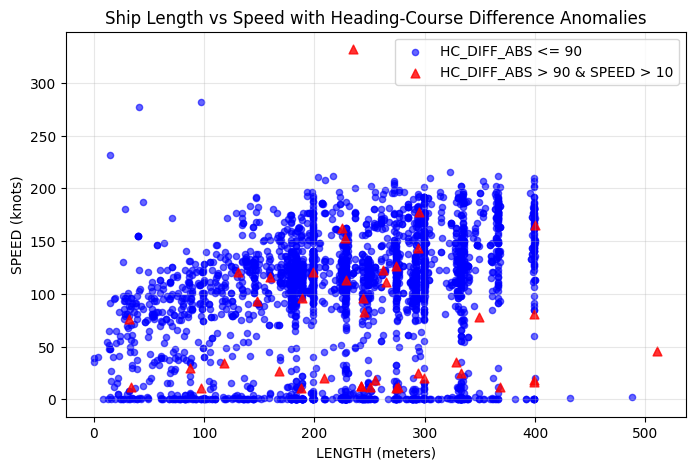

Number of anomalous points (HC_DIFF_ABS > 90 & SPEED > 10): 41


In [167]:
# Create the scatter plot
plt.figure(figsize=(8, 5))

# Plot normal points (HC_DIFF_ABS <= threshold)
threshold = 90
normal = both[both['HC_DIFF_ABS'] <= threshold]
anomalous = both[(both['HC_DIFF_ABS'] > threshold) & (both['SPEED'] > 10)]

plt.scatter(normal['LENGTH'], normal['SPEED'], alpha=0.6, c='blue', s=20, label=f'HC_DIFF_ABS <= {threshold}')
plt.scatter(anomalous['LENGTH'], anomalous['SPEED'], alpha=0.8, c='red', s=40, marker='^', label=f'HC_DIFF_ABS > {threshold} & SPEED > 10')

plt.xlabel('LENGTH (meters)')
plt.ylabel('SPEED (knots)')
plt.title('Ship Length vs Speed with Heading-Course Difference Anomalies')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Number of anomalous points (HC_DIFF_ABS > {threshold} & SPEED > 10): {len(anomalous)}")

In [168]:
# extreme HC_DIFF outliers
both[both['HC_DIFF_ABS'] > 90][['SHIPNAME', 'HEADING', 'COURSE', 'HC_DIFF_ABS', 'SPEED', 'LENGTH', 'SHIPTYPE']].sort_values('HC_DIFF_ABS', ascending=False)

,SHIPNAME,HEADING,COURSE,HC_DIFF_ABS,SPEED,LENGTH,SHIPTYPE
7999,AFRICAN JAY,12.0,192.0,180.0,0.0,183.0,Cargo Vessel
3620,VIALLI,163.0,343.0,180.0,0.0,183.0,Tanker
6290,PSU FIFTH,291.0,111.0,180.0,0.0,328.0,Cargo Vessel
5407,RIMINI,155.0,335.0,180.0,30.0,87.0,Cargo Vessel
7192,WILSON FLEX IV,184.0,3.0,179.0,0.0,88.0,Cargo Vessel
...,...,...,...,...,...,...,...
4813,LENA KNUTSEN,56.0,147.0,91.0,8.0,285.0,Tanker
2233,USAN FPSO,23.0,292.0,91.0,1.0,320.0,Tanker
7524,MBA ROSARIA,199.0,108.0,91.0,1.0,229.0,Cargo Vessel
7387,NAUTILUS I,311.0,220.0,91.0,1.0,274.0,Tanker


np.float64(0.7747813411078717)

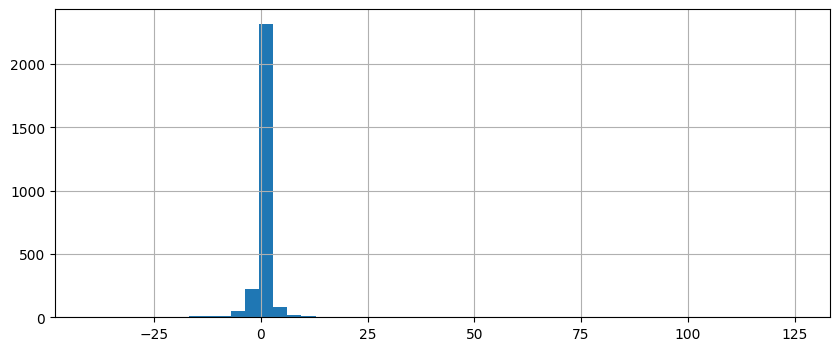

In [169]:
# ROT analysis
df['ROT'].hist(bins=50, figsize=(10,4))
df['ROT'].describe()
(df['ROT'] == 0).sum() / df['ROT'].notna().sum()

C:\Users\Neil Lunavat\AppData\Local\Temp\ipykernel_404\1328374591.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df['ROT'].notna()].groupby(pd.cut(df['SPEED'], bins=[-1, 2, 5, 10, 1000]))['ROT'].describe()


,count,mean,std,min,25%,50%,75%,max
SPEED,,,,,,,,
"(-1, 2]",589.0,-0.101868,1.671026,-24.0,0.0,0.0,0.0,11.0
"(2, 5]",43.0,0.302326,1.970435,-4.0,0.0,0.0,0.0,9.0
"(5, 10]",49.0,0.000000,2.263846,-8.0,0.0,0.0,0.0,11.0
"(10, 1000]",2046.0,0.044477,4.334597,-40.0,0.0,0.0,0.0,125.0


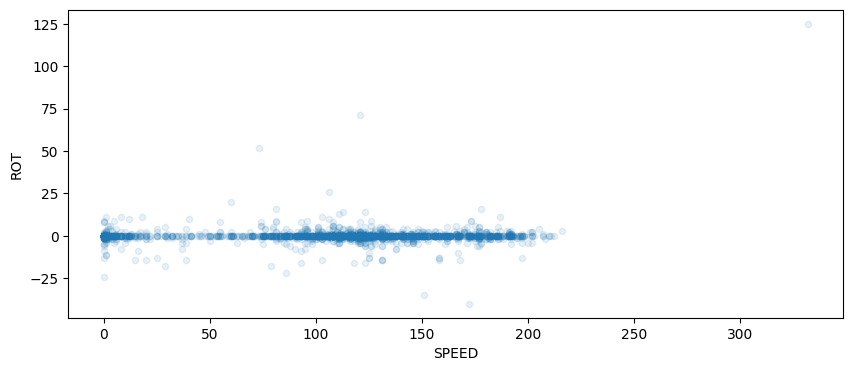

In [170]:
# ROT vs SPEED
df[df['ROT'].notna() & df['SPEED'].notna()].plot.scatter('SPEED', 'ROT', alpha=0.1, figsize=(10,4))
df[df['ROT'].notna()].groupby(pd.cut(df['SPEED'], bins=[-1, 2, 5, 10, 1000]))['ROT'].describe()

In [171]:
# extreme ROT outliers
df[df['ROT'].abs() > df['ROT'].abs().quantile(0.99)][['SHIPNAME', 'ROT', 'SPEED', 'LENGTH', 'SHIPTYPE']].sort_values('ROT', key=abs, ascending=False)

,SHIPNAME,ROT,SPEED,LENGTH,SHIPTYPE
5122,AAA,125.0,332.0,235.0,Unspecified Ship
3139,BUNUN FORTUNE,71.0,121.0,179.0,Cargo Vessel
2469,VESTLAND,52.0,73.0,69.0,Cargo Vessel
5758,AMELIE BORCHARD,-40.0,172.0,134.0,Cargo Vessel
1358,NAVIGATOR TITAN,-35.0,151.0,154.0,Tanker
162,ANCHORAGE,26.0,106.0,105.0,Tugs & Special Craft
5443,NESTOR I,-24.0,0.0,179.0,Cargo Vessel
3135,ANTHAS,-22.0,86.0,89.0,Tanker
5387,WILPRIDE,20.0,60.0,289.0,Tanker
1491,METEOR,-18.0,79.0,97.0,Tugs & Special Craft


,LENGTH,WIDTH
LENGTH,1.000000,0.931309
WIDTH,0.931309,1.000000


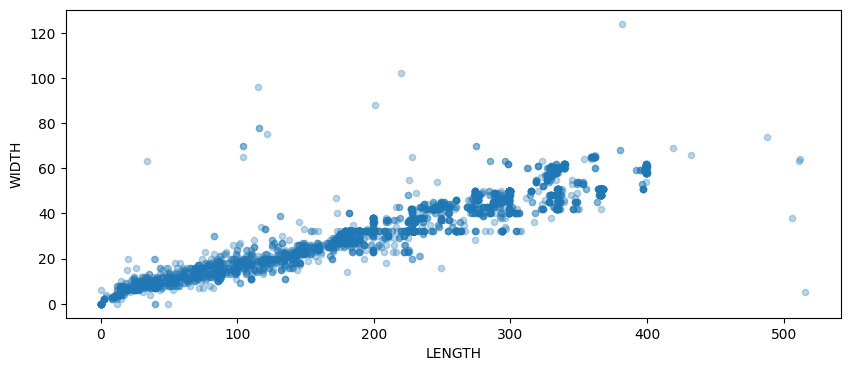

In [172]:
# LENGTH vs WIDTH correlation
df[df['LENGTH'].notna() & df['WIDTH'].notna()].plot.scatter('LENGTH', 'WIDTH', alpha=0.3, figsize=(10,4))
df[['LENGTH', 'WIDTH']].corr()

count    4764.000000
mean        6.170217
std         1.833404
min         0.000000
25%         5.708333
50%         6.218750
75%         6.745763
max       103.200000
Name: LW_RATIO, dtype: float64

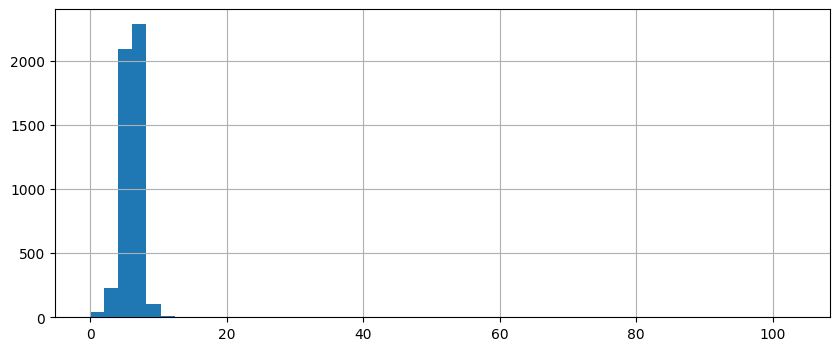

In [173]:
# LENGTH/WIDTH ratio (shape factor) - only for rows where both LENGTH and WIDTH exist and WIDTH > 0
valid_lw = df[(df['LENGTH'].notna()) & (df['WIDTH'].notna()) & (df['WIDTH'] > 0)].copy()
valid_lw['LW_RATIO'] = valid_lw['LENGTH'] / valid_lw['WIDTH']

# Add LW_RATIO back to main dataframe
df['LW_RATIO'] = valid_lw['LW_RATIO']

df['LW_RATIO'].hist(bins=50, figsize=(10,4))
df['LW_RATIO'].describe()

In [174]:
# LW_RATIO vs SHIPTYPE
df.groupby('SHIPTYPE')['LW_RATIO'].describe()


,count,mean,std,min,25%,50%,75%,max
SHIPTYPE,,,,,,,,
Cargo Vessel,2875.0,6.569516,0.853427,1.000000,6.000000,6.428571,7.125000,12.857143
Fishing,197.0,5.328839,7.157416,1.625000,3.937500,4.687500,5.750000,103.200000
High Speed Craft,4.0,3.862179,0.417816,3.416667,3.652244,3.807692,4.017628,4.416667
Navigation Aids,9.0,2.368421,4.105263,1.000000,1.000000,1.000000,1.000000,13.315789
Passenger Vessel,109.0,6.116123,1.964557,1.266667,4.500000,6.428571,7.305556,12.272727
Pleasure Craft,65.0,3.579350,1.715086,0.000000,2.500000,3.333333,4.250000,8.111111
Tanker,1262.0,5.918349,0.635678,2.687500,5.600000,5.718750,6.189189,15.562500
Tugs & Special Craft,239.0,4.334796,1.459281,1.000000,3.366987,4.333333,5.046537,11.611111
Unspecified Ship,4.0,4.180060,3.287893,1.000000,1.750000,3.797619,6.227679,8.125000


In [175]:
# unusual LW_RATIO outliers
df[df['LW_RATIO'] > df['LW_RATIO'].quantile(0.997)][['SHIPNAME', 'LENGTH', 'WIDTH', 'LW_RATIO', 'SHIPTYPE']].sort_values('LW_RATIO', ascending=False)

,SHIPNAME,LENGTH,WIDTH,LW_RATIO,SHIPTYPE
6526,CHYUAN SHENG NO.226,516.0,5.0,103.200000,Fishing
5415,SOHO SQUARE,249.0,16.0,15.562500,Tanker
5583,TEST VATON,506.0,38.0,13.315789,Navigation Aids
1153,PVT FORTUNE,180.0,14.0,12.857143,Cargo Vessel
5338,VIKING BRAGI,135.0,11.0,12.272727,Passenger Vessel
2367,AVALON PANORAMA,135.0,11.0,12.272727,Passenger Vessel
5216,AVALON,135.0,11.0,12.272727,Cargo Vessel
979,NEW VENTURE,82.0,7.0,11.714286,Fishing
1018,CAPT JW BANTA,209.0,18.0,11.611111,Tugs & Special Craft
9377,TROODOS SUN,228.0,20.0,11.400000,Cargo Vessel


In [176]:

df[df['LW_RATIO'] < df['LW_RATIO'].quantile(0.003)][['SHIPNAME', 'LENGTH', 'WIDTH', 'LW_RATIO', 'SHIPTYPE']].sort_values('LW_RATIO')

,SHIPNAME,LENGTH,WIDTH,LW_RATIO,SHIPTYPE
2296,BIG GAL,0.0,6.0,0.000000,Pleasure Craft
4712,COUNTACH,34.0,63.0,0.539683,Pleasure Craft
305,NOAA BUOY,2.0,2.0,1.000000,Navigation Aids
240,DS1 STRAUMM,2.0,2.0,1.000000,Navigation Aids
2847,ROCAS HERDMAN,4.0,4.0,1.000000,Navigation Aids
3739,NRL TEST 2,20.0,20.0,1.000000,Tugs & Special Craft
4300,700000008 7V,2.0,2.0,1.000000,Cargo Vessel
2478,HBII STRAUMM,2.0,2.0,1.000000,Navigation Aids
8448,992881705 9V,2.0,2.0,1.000000,Unspecified Ship
5445,BUOY 10,2.0,2.0,1.000000,Navigation Aids


In [177]:
# DWT analysis by SHIPTYPE
df.groupby('SHIPTYPE')['DWT'].describe()
df[df['DWT'] > 0].groupby('SHIPTYPE')['DWT'].describe()

,count,mean,std,min,25%,50%,75%,max
SHIPTYPE,,,,,,,,
Cargo Vessel,2854.0,99255.360547,79549.543838,200.0,38877.25,80496.5,155425.75,404389.0
Fishing,126.0,2197.174603,2585.869104,30.0,442.75,1277.0,3042.50,13494.0
High Speed Craft,4.0,616.000000,388.085901,52.0,545.50,738.0,808.50,936.0
Passenger Vessel,94.0,4730.617021,5753.574599,35.0,750.00,2100.0,8479.50,39350.0
Pleasure Craft,10.0,462.300000,582.805676,40.0,66.00,144.0,726.25,1650.0
Tanker,1262.0,136239.198098,107153.869812,349.0,49999.00,108442.5,159536.75,441585.0
Tugs & Special Craft,173.0,14644.710983,46187.567585,32.0,419.00,2094.0,7000.00,499125.0


,DWT,LENGTH
DWT,1.000000,0.803939
LENGTH,0.803939,1.000000


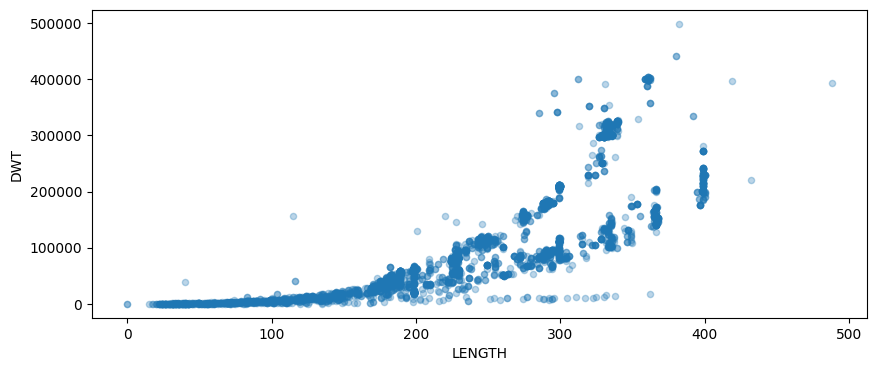

In [178]:
# DWT vs LENGTH
df[df['DWT'].notna() & df['LENGTH'].notna()].plot.scatter('LENGTH', 'DWT', alpha=0.3, figsize=(10,4))
df[['DWT', 'LENGTH']].corr()

In [179]:
# ELAPSED 
df.drop(['ELAPSED'], axis=1, inplace=True)

,LAT,LON
count,10141.000000,10141.000000
mean,4.665207,7.123896
std,27.617876,92.489427
min,-67.571815,-179.994200
25%,-15.111783,-56.018478
50%,0.796538,0.311667
75%,25.147181,76.173332
max,81.064270,179.989170


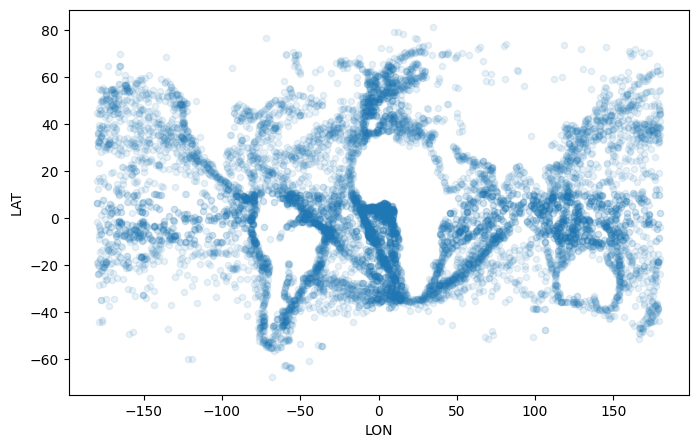

In [180]:
# geographic clustering (LAT, LON)
df.plot.scatter('LON', 'LAT', alpha=0.1, figsize=(8,5))
df[['LAT', 'LON']].describe()

Text(0, 0.5, 'Latitude')

<Figure size 1000x600 with 0 Axes>

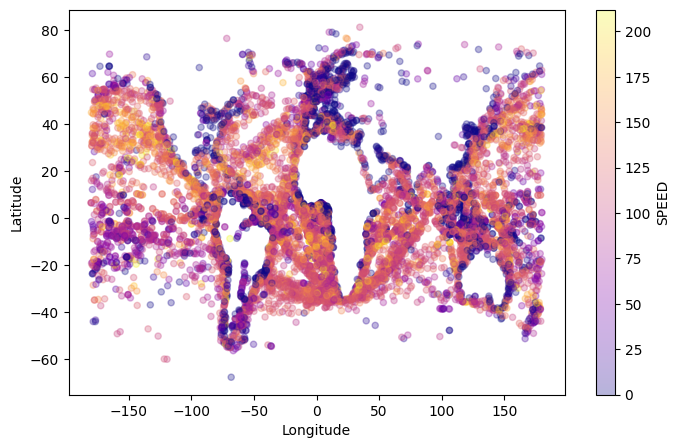

In [181]:
# SPEED vs geographic location
plt.figure(figsize=(10, 6))
scatter = df[df['SPEED'].notna()].plot.scatter('LON', 'LAT', c='SPEED', cmap='plasma', alpha=0.3, figsize=(8,5), colorbar=True, vmin=0, vmax=df['SPEED'].quantile(0.999))
plt.xlabel('Longitude')
plt.ylabel('Latitude')

,LAT,LON,SPEED,COURSE,HEADING,LENGTH,WIDTH,DWT,ROT,LW_RATIO
LAT,1.000000,-0.079969,-0.076720,-0.018524,-0.018238,-0.112659,-0.120060,-0.136464,-0.021550,0.026763
LON,-0.079969,1.000000,-0.043698,-0.012340,-0.040174,0.107907,0.126300,0.134665,-0.015875,0.027177
SPEED,-0.076720,-0.043698,1.000000,0.026017,0.007225,0.330140,0.238247,0.068482,0.042991,0.157584
COURSE,-0.018524,-0.012340,0.026017,1.000000,0.708176,0.024539,0.032983,0.037981,0.032154,-0.021130
HEADING,-0.018238,-0.040174,0.007225,0.708176,1.000000,0.005385,0.006491,0.005112,0.004865,-0.001378
LENGTH,-0.112659,0.107907,0.330140,0.024539,0.005385,1.000000,0.931309,0.803939,0.002799,0.309359
WIDTH,-0.120060,0.126300,0.238247,0.032983,0.006491,0.931309,1.000000,0.882719,0.008331,0.072188
DWT,-0.136464,0.134665,0.068482,0.037981,0.005112,0.803939,0.882719,1.000000,0.000125,-0.041153
ROT,-0.021550,-0.015875,0.042991,0.032154,0.004865,0.002799,0.008331,0.000125,1.000000,-0.012126
LW_RATIO,0.026763,0.027177,0.157584,-0.021130,-0.001378,0.309359,0.072188,-0.041153,-0.012126,1.000000


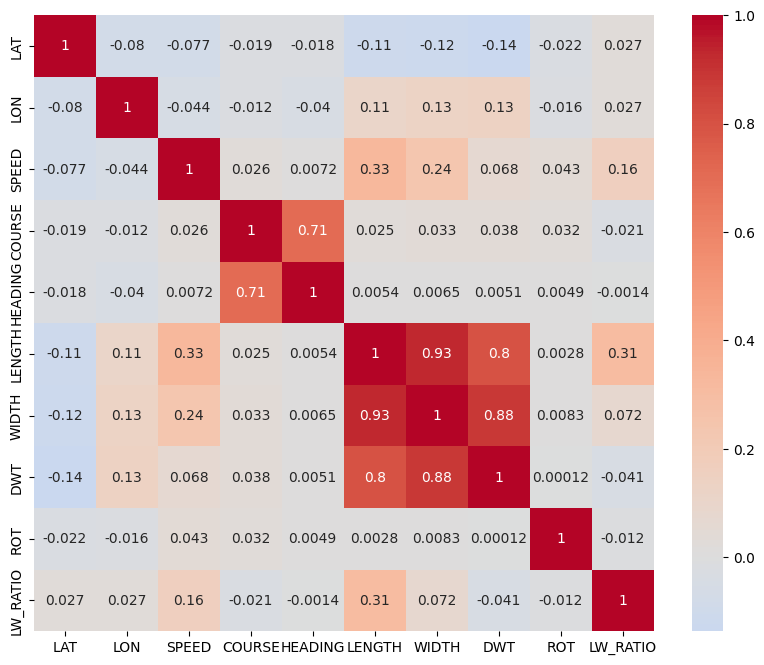

In [182]:
# correlation matrix (numerical features)
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['LAT', 'LON', 'SPEED', 'COURSE', 'HEADING', 'LENGTH', 'WIDTH', 'DWT', 'ROT', 'LW_RATIO']
corr = df[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
corr

In [183]:
# combined anomaly score
anomaly = df.copy()
anomaly['SPEED_ZSCORE'] = (anomaly['SPEED'] - anomaly['SPEED'].mean()) / anomaly['SPEED'].std()
anomaly['HC_DIFF'] = anomaly.apply(lambda r: abs(r['HEADING'] - r['COURSE']) if pd.notna(r['HEADING']) and pd.notna(r['COURSE']) else 0, axis=1)
anomaly['HC_DIFF'] = anomaly['HC_DIFF'].apply(lambda x: x if x <= 180 else 360 - x)
anomaly['ROT_ABS'] = anomaly['ROT'].abs()
anomaly['ROT_ZSCORE'] = (anomaly['ROT_ABS'] - anomaly['ROT_ABS'].mean()) / anomaly['ROT_ABS'].std()

anomaly[['SHIPNAME', 'SPEED', 'SPEED_ZSCORE', 'HC_DIFF', 'ROT', 'ROT_ZSCORE', 'LENGTH']].describe()

,SPEED,SPEED_ZSCORE,HC_DIFF,ROT,ROT_ZSCORE,LENGTH
count,10077.000000,1.007700e+04,10141.000000,2744.000000,2.744000e+03,4797.000000
mean,98.437630,8.179315e-17,8.631101,0.016035,-1.035777e-17,221.774234
std,52.542102,1.000000e+00,29.073981,3.841904,1.000000e+00,95.900569
min,0.000000,-1.873500e+00,0.000000,-40.000000,-2.247816e-01,0.000000
25%,78.000000,-3.889763e-01,0.000000,0.000000,-2.247816e-01,177.000000
50%,110.000000,2.200591e-01,0.000000,0.000000,-2.247816e-01,228.000000
75%,130.000000,6.007063e-01,1.000000,0.000000,-2.247816e-01,294.000000
max,405.000000,5.834604e+00,180.000000,125.000000,3.312301e+01,516.000000
